In [1]:
import pandas as pd 
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("resultsq0.5.csv")
mu1, mu2, mu3 = np.mean(data[['Linear Greedy Val']]), np.mean(data[['Quadratic Greedy Val']]), np.mean(data[['Projected Subgradient Val']])
print(mu1, mu2, mu3)

0.14306394445219373 -0.00017794680473081156 -0.0015584272269325381


In [3]:
negatives = data[
        (data['Projected Subgradient Val'] < 0) |
        (data['Quadratic Greedy Val'] < 0) |
        (data['Linear Greedy Val'] < 0)
    ].reset_index(drop=True)

negative_vals = negatives[['Linear Greedy Val', 'Quadratic Greedy Val', 'Projected Subgradient Val']]

print("Filtered negative values:")
print(len(negatives))
print(negatives)

Filtered negative values:
32
    Linear Greedy Val  Quadratic Greedy Val  Projected Subgradient Val  \
0           -0.151317             -0.069133              -1.513169e-01   
1            0.039401             -0.012241               0.000000e+00   
2            0.010691              0.003082              -1.877819e-02   
3            0.357919              0.031308              -3.338083e-02   
4           -0.000335             -0.000084               0.000000e+00   
5            0.023132             -0.001723               0.000000e+00   
6           -0.000180             -0.004799               0.000000e+00   
7            0.098512              0.000000              -1.665335e-16   
8            0.006078             -0.013054              -3.963597e-02   
9            0.505174              0.018656              -8.412511e-03   
10           0.086495              0.021624              -4.815334e-03   
11          -0.117747             -0.029437              -1.177474e-01   
12       

In [10]:
import numpy as np
from scipy import stats

# Assuming these arrays are already defined
linear = np.array(negative_vals['Linear Greedy Val'])
quadratic = np.array(negative_vals['Quadratic Greedy Val'])
projected = np.array(negative_vals['Projected Subgradient Val'])

# Means
lmu, qmu, pmu = np.mean(linear), np.mean(quadratic), np.mean(projected)
print(f"\nMeans:\nLinear Greedy: {lmu:.6f}, Quadratic Greedy: {qmu:.6f}, Projected: {pmu:.6f}")

# Paired t-test: difference of means (d = linear - quadratic)
t_stat, p_two_sided = stats.ttest_rel(linear, quadratic)

# One-sided p-value (H1: Linear > Quadratic)
if t_stat > 0:
    p_one_sided = p_two_sided / 2
else:
    p_one_sided = 1 - p_two_sided / 2

print(f"\nPaired t-test:\nt-statistic = {t_stat:.4f}, one-sided p-value = {p_one_sided:.4f}")

# Interpretation
alpha = 0.05
if p_one_sided < alpha:
    print("Reject H0: Linear Greedy has a significantly higher mean than Quadratic Greedy.")
else:
    print("Fail to reject H0: No significant difference in means.")

# --- 95% Confidence Interval for mean difference ---

# Compute paired differences
diff = linear - quadratic
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)
n = len(diff)
df = n - 1

# Critical t-value for 95% CI (two-sided)
t_crit = stats.t.ppf(1 - 0.05 / 2, df)

# Margin of error
margin = t_crit * (std_diff / np.sqrt(n))

# CI
ci_lower = mean_diff - margin
ci_upper = mean_diff + margin

print(f"95% Confidence Interval for mean difference (Linear - Quadratic): [{ci_lower:.6f}, {ci_upper:.6f}]")



Means:
Linear Greedy: 0.071100, Quadratic Greedy: -0.008098, Projected: -0.048701

Paired t-test:
t-statistic = 1.9913, one-sided p-value = 0.0277
Reject H0: Linear Greedy has a significantly higher mean than Quadratic Greedy.
95% Confidence Interval for mean difference (Linear - Quadratic): [-0.001916, 0.160311]


In [9]:
from scipy import stats
import numpy as np

# Assuming this is already defined
linear = np.array(negative_vals['Linear Greedy Val'])

# One-sample t-test against 0
t_stat, p_two_sided = stats.ttest_1samp(linear, popmean=0)

# Convert to one-sided p-value (H1: mu_l > 0)
if t_stat > 0:
    p_one_sided = p_two_sided / 2
else:
    p_one_sided = 1 - p_two_sided / 2

# Report
print(f"\nOne-sample t-test for mu_l > 0:")
print(f"t-statistic = {t_stat:.4f}, one-sided p-value = {p_one_sided:.4f}")

# Decision
alpha = 0.05
if p_one_sided < alpha:
    print("Reject H0: The mean of Linear Greedy is significantly greater than 0.")
else:
    print("Fail to reject H0: No significant evidence that the mean of Linear Greedy is greater than 0.")

# Confidence interval calculation
mean_l = np.mean(linear)
std_l = np.std(linear, ddof=1)  # sample std deviation
n = len(linear)
df = n - 1

# Critical t-value for 95% CI (two-sided)
t_crit = stats.t.ppf(1 - 0.05/2, df)

# Margin of error
margin = t_crit * (std_l / np.sqrt(n))

# Confidence interval
ci_lower = mean_l - margin
ci_upper = mean_l + margin

print(f"95% Confidence Interval for mu_l: [{ci_lower:.6f}, {ci_upper:.6f}]")



One-sample t-test for mu_l > 0:
t-statistic = 1.6996, one-sided p-value = 0.0496
Reject H0: The mean of Linear Greedy is significantly greater than 0.
95% Confidence Interval for mu_l: [-0.014219, 0.156419]


In [8]:
from scipy import stats
import numpy as np

# Assuming this is already defined
quadratic = np.array(negative_vals['Quadratic Greedy Val'])

# One-sample t-test against 0
t_stat, p_two_sided = stats.ttest_1samp(quadratic, popmean=0)

# Convert to one-sided p-value (H1: mu_l > 0)
if t_stat >= 0:
    p_one_sided = 1 - p_two_sided / 2
else:
    p_one_sided = p_two_sided / 2

# Report
print(f"\nOne-sample t-test for mu_q > 0:")
print(f"t-statistic = {t_stat:.4f}, one-sided p-value = {p_one_sided:.4f}")

# Decision
alpha = 0.05
if p_one_sided < alpha:
    print("Reject H0: The mean of Quadratic Greedy is significantly less than 0.")
else:
    print("Fail to reject H0: No significant evidence that the mean of Quadratic Greedy is less than 0.")

# Confidence interval calculation
mean_q = np.mean(quadratic)
std_q = np.std(quadratic, ddof=1)  # sample std dev
n = len(quadratic)
df = n - 1

# Critical t-value for 95% CI (two-sided)
t_crit = stats.t.ppf(1 - 0.05/2, df)

# Margin of error
margin = t_crit * (std_q / np.sqrt(n))

# Confidence interval
ci_lower = mean_q - margin
ci_upper = mean_q + margin

print(f"\n95% Confidence Interval for mu_q: [{ci_lower:.6f}, {ci_upper:.6f}]")



One-sample t-test for mu_q > 0:
t-statistic = -1.8952, one-sided p-value = 0.0337
Reject H0: The mean of Quadratic Greedy is significantly less than 0.

95% Confidence Interval for mu_q: [-0.016812, 0.000617]


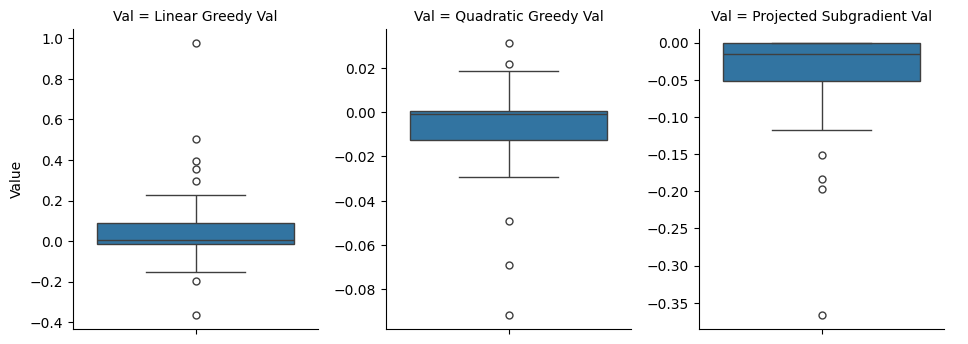

In [5]:
vals_long = pd.melt(negative_vals, var_name='Val', value_name='Value')
vals_long.head()

g = sns.catplot(
    data=vals_long, y='Value',
    kind='box', col='Val', col_wrap=3, sharey=False,
    height=4, aspect=0.8
)
g.fig.subplots_adjust(top=0.8)
plt.show()